In [1]:
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['pdf.fonttype'] = 42

# Figure 6a

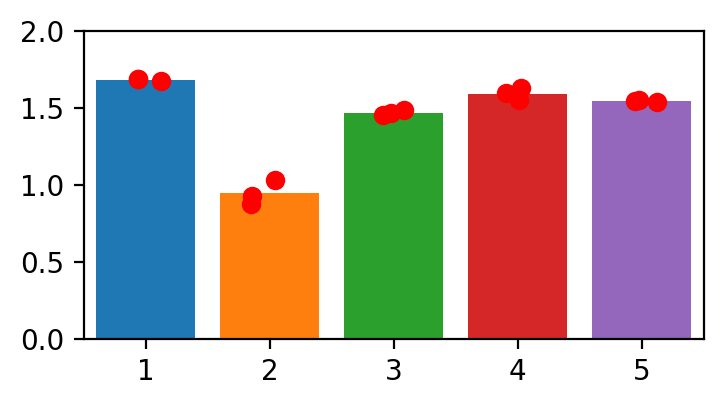

In [2]:
def x_univar(n, spread=0.3):
    return(spread*(np.random.rand(n)-0.5))

# gel data
plt.figure(figsize=[4,2])

wild_25 = np.array([12627.489, 13983.075, 12489.368])
wild_18 = np.array([7490.589, 8310.882, 7479.175])
dbp7_25 = np.array([7711.175, 7414.589, 10190.418])
dbp7_18 = np.array([8354.660, 8462.489, 9887.368])
spt4_25 = np.array([14639.095, 14241.267, 15401.974])
spt4_18 = np.array([9454.004, 9268.711, 9986.589])
dbp3_25 = np.array([11943.489, 12262.489, 13780.560])
dbp3_18 = np.array([8231.518, 8375.054, 9274.175])
stm1_25 = np.array([14174.510, 14900.267, 14929.853])
stm1_18 = np.array([9159.711, 9167.296, 9371.175])

plt.bar(1, np.mean((wild_25/wild_18)))
plt.plot(np.array([1,1,1])+x_univar(3), (wild_25/wild_18), 'or')

plt.bar(2, np.mean((dbp7_25/dbp7_18)))
plt.plot(np.array([2,2,2])+x_univar(3), (dbp7_25/dbp7_18), 'or')

plt.bar(3, np.mean((dbp3_25/dbp3_18)))
plt.plot(np.array([3,3,3])+x_univar(3), (dbp3_25/dbp3_18), 'or')

plt.bar(4, np.mean((stm1_25/stm1_18)))
plt.plot(np.array([4,4,4])+x_univar(3), (stm1_25/stm1_18), 'or')

plt.bar(5, np.mean((spt4_25/spt4_18)))
plt.plot(np.array([5,5,5])+x_univar(3), (spt4_25/spt4_18), 'or')

plt.xlim([0.5, 5.5])
plt.ylim([0, 2])
plt.show()

# Figure 6b

In [3]:
from src.DMS_Profile import Genome, Targeted_DMS_Profile, targeted_combine_profiles
from src.CotrxMatrix import CotrxMatrix, combine_reps
from src.dms_utils import weighted_moving_average

In [4]:
# rRNA comparisons 
genome_rrna = Genome('../data/genome/scer_chr_kan.FASTA', coords=(11, 451575, 458433), reverse=True)

# load matrices
min_cov = 800

wild_1 = CotrxMatrix('../data/processed/pro_wild_1_rRNA.pkl', 'wild_R1', genome_rrna.seq, '-')
wild_2 = CotrxMatrix('../data/processed/pro_wild_2_rRNA.pkl', 'wild_R2', genome_rrna.seq, '-')
wild_3 = CotrxMatrix('../data/processed/pro_wild_3_rRNA.pkl', 'wild_R3', genome_rrna.seq, '-')
wild_7 = CotrxMatrix('../data/processed/pro_wild_7_rRNA.pkl', 'wild_R7', genome_rrna.seq, '-')
wild_8 = CotrxMatrix('../data/processed/pro_wild_8_rRNA.pkl', 'wild_R8', genome_rrna.seq, '-')
wild = combine_reps([wild_1, wild_2, wild_3, wild_7, wild_8], 'wild')
wild.process()

dbp7_1 = CotrxMatrix('../data/processed/pro_dbp7_1_rRNA.pkl', 'dbp7_R1', genome_rrna.seq, '-')
dbp7_2 = CotrxMatrix('../data/processed/pro_dbp7_2_rRNA.pkl', 'dbp7_R2', genome_rrna.seq, '-')
dbp7_3 = CotrxMatrix('../data/processed/pro_dbp7_3_rRNA.pkl', 'dbp7_R3', genome_rrna.seq, '-')
dbp7 = combine_reps([dbp7_1, dbp7_2, dbp7_3], 'dbp7')
dbp7.process()

dbp3_1 = CotrxMatrix('../data/processed/pro_dbp3_1_rRNA.pkl', 'dbp3_R1', genome_rrna.seq, '-')
dbp3_2 = CotrxMatrix('../data/processed/pro_dbp3_2_rRNA.pkl', 'dbp3_R2', genome_rrna.seq, '-')
dbp3_3 = CotrxMatrix('../data/processed/pro_dbp3_3_rRNA.pkl', 'dbp3_R3', genome_rrna.seq, '-')
dbp3 = combine_reps([dbp3_1, dbp3_2, dbp3_3], 'dbp3')
dbp3.process()

spt4_1 = CotrxMatrix('../data/processed/pro_spt4_1_rRNA.pkl', 'spt4_R1', genome_rrna.seq, '-')
spt4_2 = CotrxMatrix('../data/processed/pro_spt4_2_rRNA.pkl', 'spt4_R2', genome_rrna.seq, '-')
spt4_3 = CotrxMatrix('../data/processed/pro_spt4_3_rRNA.pkl', 'spt4_R3', genome_rrna.seq, '-')
spt4 = combine_reps([spt4_1, spt4_2, spt4_3], 'spt4')
spt4.process()

stm1_1 = CotrxMatrix('../data/processed/pro_stm1_1_rRNA.pkl', 'stm1_R1', genome_rrna.seq, '-')
stm1_2 = CotrxMatrix('../data/processed/pro_stm1_2_rRNA.pkl', 'stm1_R2', genome_rrna.seq, '-')
stm1_3 = CotrxMatrix('../data/processed/pro_stm1_3_rRNA.pkl', 'stm1_R3', genome_rrna.seq, '-')
stm1 = combine_reps([stm1_1, stm1_2, stm1_3], 'stm1')
stm1.process()

/Users/leo/Documents/repos/CoSTseq/src/CotrxMatrix.py:445: RuntimeWarning: invalid value encountered in divide
  rea = (mut/cov)[filt_cov]
/Users/leo/Documents/repos/CoSTseq/src/CotrxMatrix.py:448: RuntimeWarning: invalid value encountered in divide
  rea = mut/cov


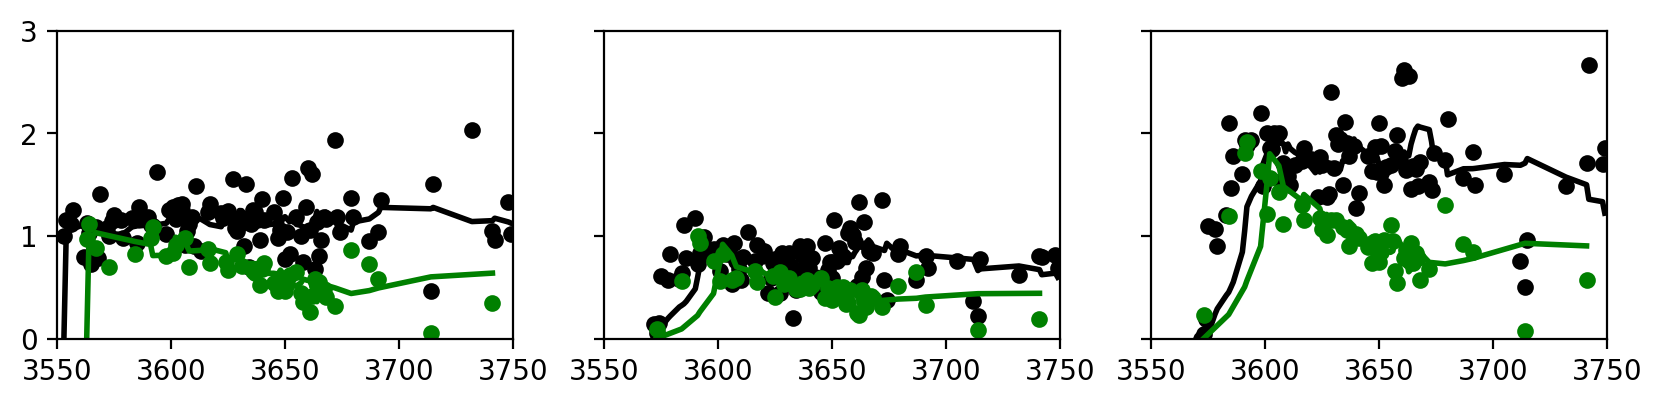

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(10,2), sharey=True, sharex=True)

for i, res in enumerate([3547, 3569, 3570]):
    x_1, y_1 = wild.get_residue_txn(res, min_cov=800, binned=False)
    z_1 = weighted_moving_average(x_1, y_1, 10)

    x_2, y_2 = dbp7.get_residue_txn(res, min_cov=800, binned=False)
    z_2 = weighted_moving_average(x_2, y_2, 5)

    axs[i].plot(x_1[x_1<3750], y_1[x_1<3750], 'ok', ms=5)
    axs[i].plot(x_1[x_1<3750], z_1[x_1<3750], '-k', lw=2)
    axs[i].plot(x_2[x_2<3750], y_2[x_2<3750], 'og', ms=5)
    axs[i].plot(x_2[x_2<3750], z_2[x_2<3750], '-g', lw=2)

plt.setp(axs, ylim=[0, 3], xlim=[3550,3750])
plt.show()

# Figure S6b

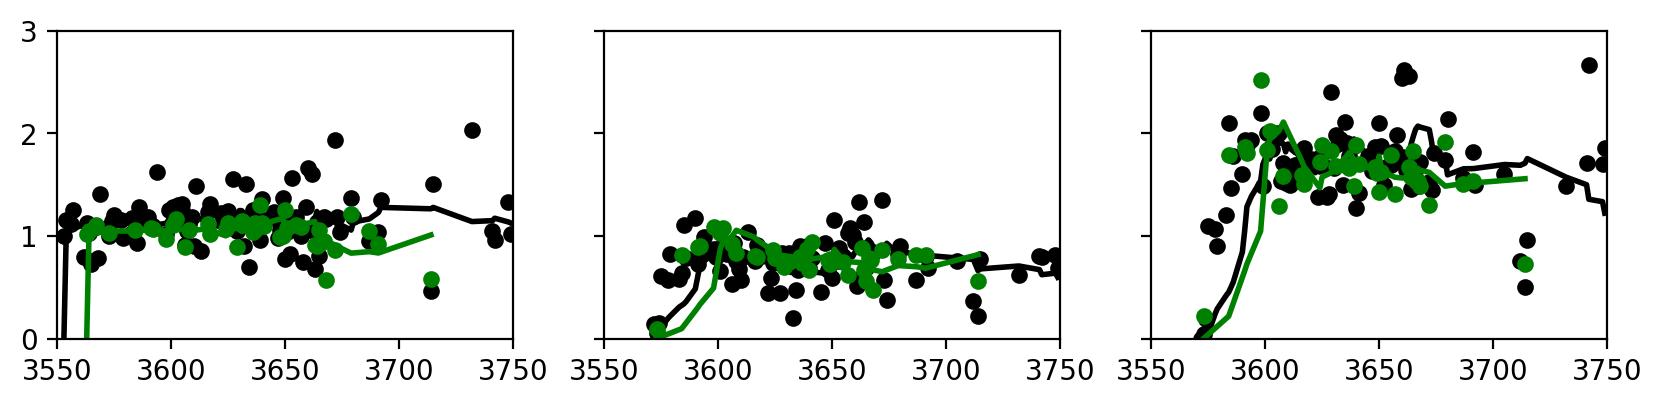

In [6]:
fig, axs = plt.subplots(1, 3, figsize=(10,2), sharey=True, sharex=True)

for i, res in enumerate([3547, 3569, 3570]):
    x_1, y_1 = wild.get_residue_txn(res, min_cov=800, binned=False)
    z_1 = weighted_moving_average(x_1, y_1, 10)

    x_2, y_2 = dbp3.get_residue_txn(res, min_cov=800, binned=False)
    z_2 = weighted_moving_average(x_2, y_2, 5)

    axs[i].plot(x_1[x_1<3750], y_1[x_1<3750], 'ok', ms=5)
    axs[i].plot(x_1[x_1<3750], z_1[x_1<3750], '-k', lw=2)
    axs[i].plot(x_2[x_2<3750], y_2[x_2<3750], 'og', ms=5)
    axs[i].plot(x_2[x_2<3750], z_2[x_2<3750], '-g', lw=2)

plt.setp(axs, ylim=[0, 3], xlim=[3550,3750])
plt.show()

# Figure 6c, Figure S6c

In [7]:
from tqdm import tqdm
from scipy.interpolate import interp1d
from src.dms_utils import moving_average

In [8]:
# dot bracket secondary structure from RNACentral
dbr_18 = '...((((.........))))((((.(((((((.(((((((((.....(((.(((..((...(((..(.((..........)))..))))).....((((.......(((((((..((..(((((((............(((((....(((((((.....)))))))....)))))......(((((((((....)))))))))(((.(((((((.......(((((.(((....)))...))))).....))))))).)..))...((((.((((.....))))))))..))))))).))))))))).(((..(.(((....((((((((.......))))))))))).....))))...((((((((....))))...))))))))((((((..........)))))).((((....))))...)))))))......(.(((...(((((...))))).)))).)).))))))....((((..(((((((....)))))))..).))).....((((((((.......))))))))........((.((......(.((((((..(((....)))....))))))))).)).))))))))))).....(...(((.......((((...(((.((....((((((((((((.((((.(((.....)))...)))).....))))))))))))....((((((....(((((((((.....)))))))))....))))))..(((((((((.......(((..(.(...).)..(((.....)))...)))......)))))..)))).....(.((....(.((.(((.............))).))..)..)).)..))...((((((((((.((((((((((((((((((((...(((......)))......))))))))))))....(..((....)))))))))))))))).))))..))))...)))).(..((((((...(((.(((((.........))))).)))))))))..).......((((((.(((..(((((((...((..........)))))))))..)))...((....))...)))....))).))))(((((.((.((((....)))))))))))........(((((.(((((((..((..(((((((((((((((((.(.)((((........))))........(((((((....(((((....(((((((((..........)))))))))..))))).(.((.((((..((((((((((..(((((((((....)))..((((......))))..)))))).....((((((((.((((..(((((.((((((....))))))...)))))..))))))).((.(((((((...)))))))))....)))))...))))).)))...).))))))))....)))))))...)).)))))))))((..(((((((.(...(((.....(((.((((....)))).)))....)))....).)))))))....).((((((((((((........))))))))))))..).))))))(...(((((((((.......)))))))))..)..))...)))))))))).))....((.((...(((((((((((.((((((((((((..(((((((((((((((((((((((((((....)))))))))))))))))))))))))))..)))))))))))))))))))))))....))..))....((((((((((....))))))))))........'
dbr_58 = '........................................((((((((......)))).....((((((....................)))).))...))))...(((...)))(((((((((....))))))))).....................'
dbr_25 = '..........................((((((.....((....))......))))).).........((....))..(((((......((.....)).....))))).((((..((((((((((((((((((...))))))))))))))))))....(((((((.((((((((((((((((((((...(.(((((....))))))..(...).(((.......)))....))))))))..))))))))....)))))))))))........(((((((........))))))).....(((((........)))))..)))).................................((....))...............((((....))))..................................((((((((((((.(..(((((...((((..((((((((.....))))))))......))))...))))).(((((((((((((((((((((((......((((((((..((((((((((....))))))..)))).))))))))....))))).))))))))))).......(((....))).....)))))))..).))))))))))))..((((........))))((((((....(((((((((((((..((((..((((.....))))..))))...((....)).......(((((..(((((....)))))...))))).((((((((...((....))...))).))).))....)))))))))))))..((((...((((((...((((((((((((.((((...(((((((....)))))))....))))...((((.((.((........))))))))..).))))))))))).(((....))).......))))))......))))..((((((....(((((....))))).(((((((((.......((((((((..(.(((....((((((((((..((((((((.....))))))))))))))))))..)).).)..)))))))).(((((((((.........)))))))))...........)))))))).)...((((((((((.....))))))))))....(((......)))...(((((((...(((......(.((((((.................(((.((((((((((.......(((((.(((..(((.........)))..)))(...)(...((......)).).)))))...)))))))))))))...................))))))))))...)))))))(((((((((.........)))))))))....))))))(.((((((((.((......((((.((((....))))))))...))))))))))..).....))))))((((.((((.....((((((.......))))))((((.....(((((.....(((((((...((.....)).))))))).....(((.((...(((((.(((....))))))......(((((........))))).....))....))...(((((........)))))..((((.(((((((.....(((....))).......((((((...((((.(((((((.(((((((((.........))))))...(((((((..(((((((((((((.....)))))))))))))..)).)))))......(((((((....)))))))..)))...))))))).)))).........))))))............))))))))))).))).........((......))))))).((((.....))))..))))..((((....((((((((((((..............(((((...((....))....)))))((((((((((((((.((((((((((((((((((....(((((((((((((((((((.(((((((((((((....))))))))))))).))))))))))))).))))))....))))))))))(((((.....)))))....))))))))......)))))..)))))))))(...).......(((((((((..(((.........)))..(((((((((..((((.....))))..)..))))))))..((((.(((..((((((.(..(((....(((((....)))))....))))))))..)))))((((((.......))))))(...).((((.(...(.)).(((((((.)..))))))..)..)))..))))...)).)))))))....)))))))))))).))))))))))))....(((((........)))))..((((((((.(((.((.....(((((.(((((((.(((((..(((((((..((((((((((((((((((.........(((((..((....))............))))))))))))).))))))))))...(((((.....((((..(((((......)))))...............((((((....))))))..))))..))))).....)))))))...)))))..((((.....))).)((((((...........))))))..((..((((((((((.((((((.......))))))...))((......))....))))))))..(((((((((.......))))))))).(((....))).))..........((((((..((((.......)))))))))).........)))))..))))))).......(((..(((((((...((.......))...)))))))...)))..........(((((((((((..((((((((((....))))))))..)).(((((.....))))).....)))))..)..)))).).....(((((((....))).))))....))..)))))))))))..((((((((..((((.((((((((...............))))))))(((((...(((....(((((((((((....))))))..)))))...)))..)))))..(((....(((((..........)))))....))).))))....)))))))).......(((((((((((((................((((((.....))))))...............((((((((..(((((((((((......))))))))))))))))))).............)))))))))))))..((((((((((.......)))))....(((((((((.((..(..((((.((((((((......)))))))))))))...))....))).))))))..)))))..'
dbr_rib = 701*'?' + dbr_18 + 361*'?' + dbr_58 + 232*'?' + dbr_25 + 210*'?'
mask_dat = np.array([True if i in [')', '(', '.'] else False for i in dbr_rib])

In [9]:
# difference in trajectories for a range of positions behind polymerase
def compare_trajectories(mat_1, mat_2, pos_diff, min_n=30, avg_win=30):

    diffs_avg_all = []
    for pos_diff in tqdm(pos_diff): # range of polymerase positions that should be included in the comparison
        diffs = []
        resis = []
        for res in range(len(genome_rrna.seq)):
            if genome_rrna.seq[res] in ['A', 'C', 'U']:

                # get trajectories
                x_1, y_1 = mat_1.get_residue_txn(res, min_cov=800, binned=False)
                x_2, y_2 = mat_2.get_residue_txn(res, min_cov=800, binned=False)

                if x_1.size >= min_n and y_1.size >= min_n:
                    # calculate moving average for trajectories
                    z_1 = weighted_moving_average(x_1, y_1, 7)
                    z_2 = weighted_moving_average(x_2, y_2, 7)

                    # interpolate on moving average
                    fit_1 = interp1d(x_1, z_1)
                    xin_1 = np.arange(x_1[0], x_1[-1]+1)
                    int_1 = fit_1(xin_1)

                    fit_2 = interp1d(x_2, z_2)
                    xin_2 = np.arange(x_2[0], x_2[-1]+1)
                    int_2 = fit_2(xin_2)

                    # if the requested nucleotide position is in range, calculate the difference
                    if int_1[xin_1==res+pos_diff].size == 1 and int_2[xin_2==res+pos_diff].size == 1:
                        resis.append(res)
                        diffs.append(float(int_1[xin_1==(res+pos_diff)])-float(int_2[xin_2==(res+pos_diff)]))
                    else:
                        resis.append(res)
                        diffs.append(np.nan)
                else:
                    resis.append(res)
                    diffs.append(np.nan)

        # calculate moving average of difference vector
        diffs_avg = moving_average(diffs, avg_win)
        diffs_avg_all.append(diffs_avg)
    
    return(diffs_avg_all, resis)

In [10]:
wild_dbp7, resis = compare_trajectories(wild, dbp7, np.arange(80, 151, 1))
wild_spt4, resis = compare_trajectories(wild, spt4, np.arange(80, 151, 1))
wild_stm1, resis = compare_trajectories(wild, stm1, np.arange(80, 151, 1))
wild_dbp3, resis = compare_trajectories(wild, dbp3, np.arange(80, 151, 1))

  0%|                                                                                                       | 0/71 [00:00<?, ?it/s]/var/folders/ts/194z07_x3blcbckw5bfw0t5h0000gn/T/ipykernel_20879/3446617308.py:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  diffs.append(float(int_1[xin_1==(res+pos_diff)])-float(int_2[xin_2==(res+pos_diff)]))
100%|██████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [01:44<00:00,  1.47s/it]


/var/folders/ts/194z07_x3blcbckw5bfw0t5h0000gn/T/ipykernel_20879/3395200198.py:5: RuntimeWarning: All-NaN slice encountered
  ax.fill_between(resis, np.nanmedian(diffs_avg_all, axis=0), color='red')


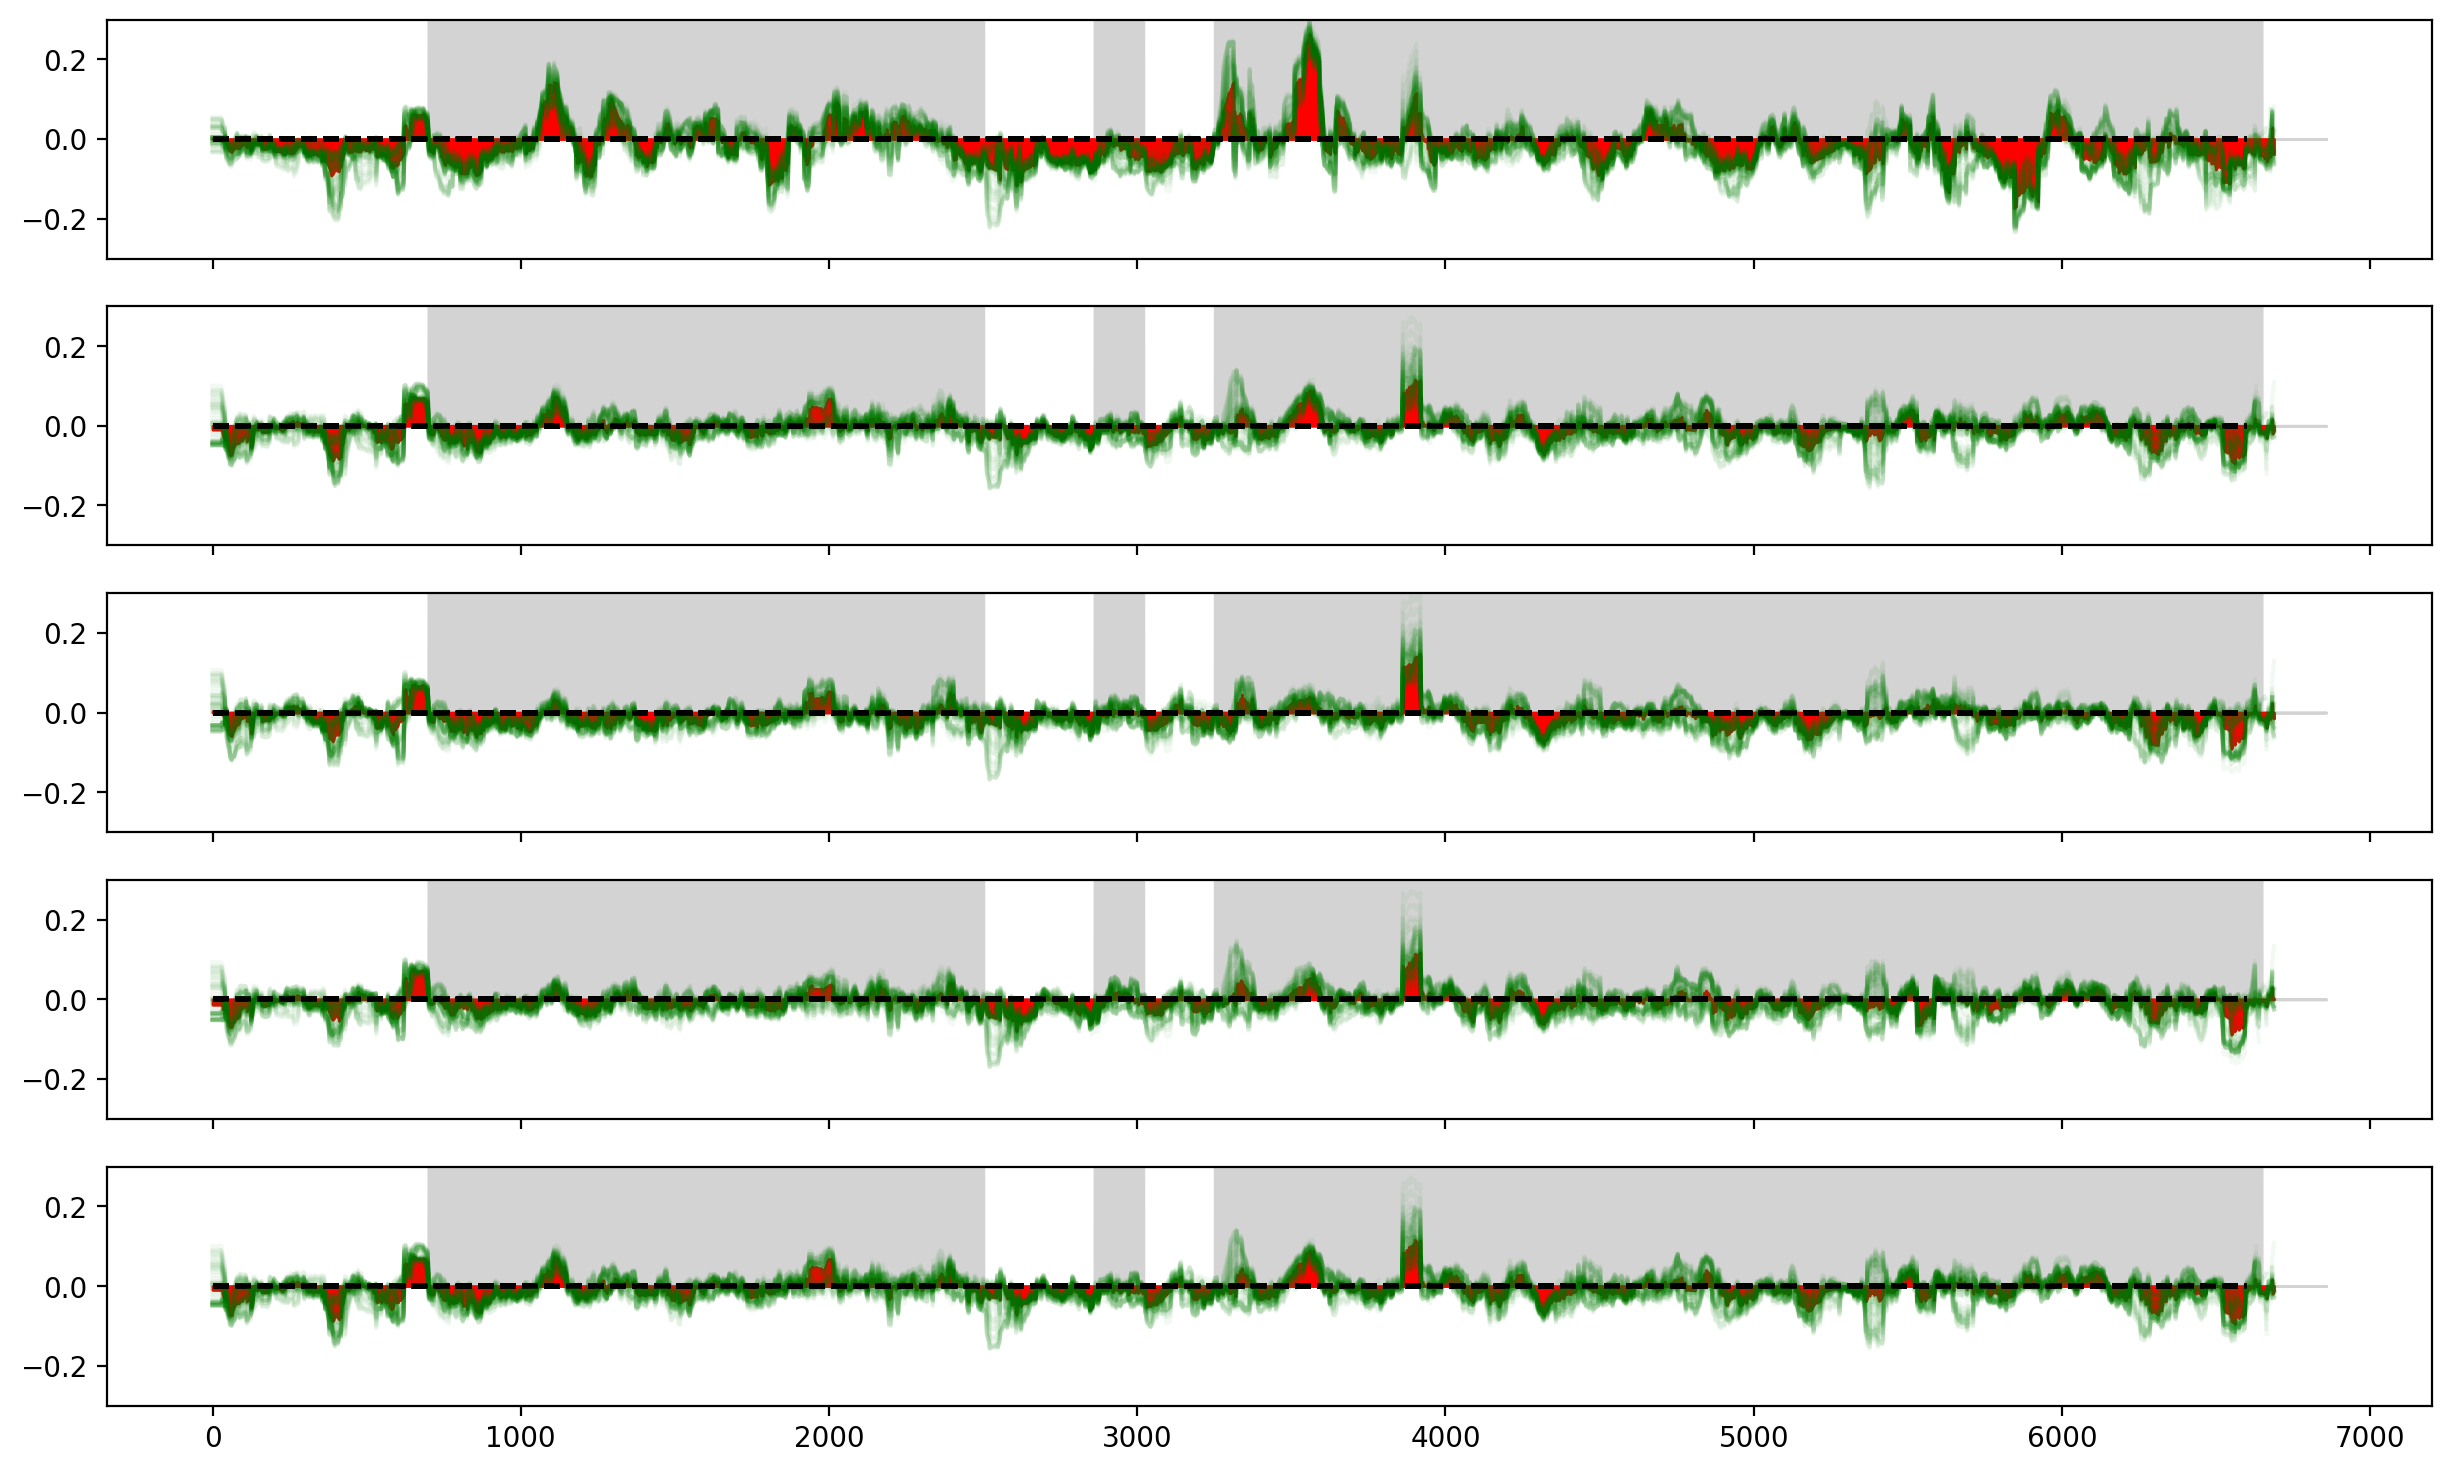

In [11]:
fig, axs = plt.subplots(5, 1, figsize=(15, 9), sharex=True, sharey=True)

for ax, diffs_avg_all in zip(axs, [wild_dbp7, wild_spt4, wild_stm1, wild_dbp3, wild_spt4]):
    ax.fill_between(np.arange(0, len(mask_dat)), mask_dat, color='lightgray')
    ax.fill_between(resis, np.nanmedian(diffs_avg_all, axis=0), color='red')
    for i in diffs_avg_all:
        ax.plot(resis, i, '-g', alpha=0.05)
        ax.plot([0, 6600], [0, 0], '--k')
    
plt.setp(axs, ylim=[-0.3, 0.3])
plt.show()

# Figure 6d, Figure S6d

In [12]:
# external_transcribed_spacer_region	 0..700	    chrXII:458432..457733
# noncoding_exon 18S                   701..2501	chrXII:457732..455933
# internal_transcribed_spacer_regio   2502..2861    chrXII:455932..455572
# noncoding_exon  5.8S                2862..3020	chrXII:455571..455414
# internal_transcribed_spacer_region  3021..3251	chrXII:455413..455182
# noncoding_exon 25S                  3252..6648	chrXII:455181..451786
# external_transcribed_spacer_region  6649..6858    chrXII:451785..451575

In [13]:
resis = np.array(resis)
resis_ets5 = resis<=700
resis_18s = (resis > 700) & (resis <= 2501)
resis_its = (resis > 2501) & (resis <= 3251)
resis_25s = (resis > 3251) & (resis <= 6648)
resis_ets3 = resis > 6648

med_dbp7 = np.nanmedian(wild_dbp7, axis=0)
med_spt4 = np.nanmedian(wild_spt4, axis=0)
med_stm1 = np.nanmedian(wild_stm1, axis=0)
med_dbp3 = np.nanmedian(wild_dbp3, axis=0)

/var/folders/ts/194z07_x3blcbckw5bfw0t5h0000gn/T/ipykernel_20879/2398457841.py:8: RuntimeWarning: All-NaN slice encountered
  med_dbp7 = np.nanmedian(wild_dbp7, axis=0)
/var/folders/ts/194z07_x3blcbckw5bfw0t5h0000gn/T/ipykernel_20879/2398457841.py:9: RuntimeWarning: All-NaN slice encountered
  med_spt4 = np.nanmedian(wild_spt4, axis=0)
/var/folders/ts/194z07_x3blcbckw5bfw0t5h0000gn/T/ipykernel_20879/2398457841.py:10: RuntimeWarning: All-NaN slice encountered
  med_stm1 = np.nanmedian(wild_stm1, axis=0)
/var/folders/ts/194z07_x3blcbckw5bfw0t5h0000gn/T/ipykernel_20879/2398457841.py:11: RuntimeWarning: All-NaN slice encountered
  med_dbp3 = np.nanmedian(wild_dbp3, axis=0)


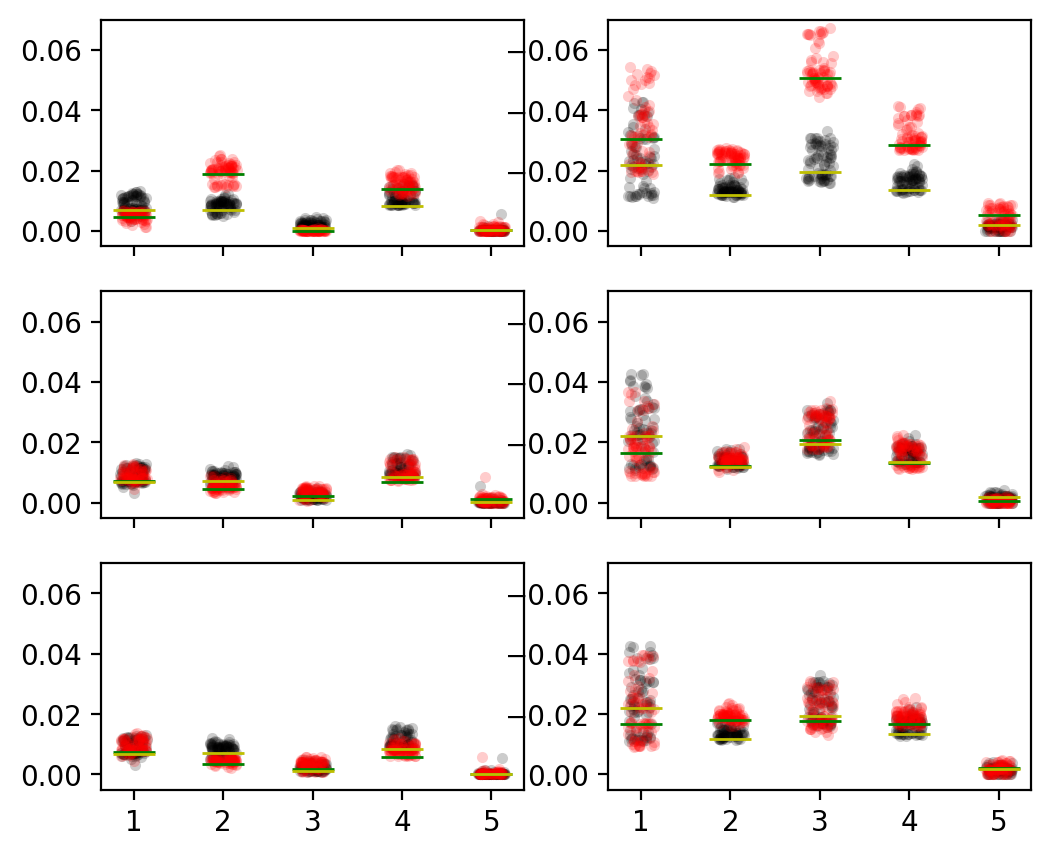

In [14]:
fig, axs = plt.subplots(3, 2, figsize=[6,5], sharex=True)
axs = axs.flatten()

def x_univar(n, spread=0.3):
    return(spread*(np.random.rand(n)-0.5))

for i in wild_spt4:
    axs[0].plot(1+x_univar(1), np.sum(i[resis_ets5 & (i>0)])/len(i[resis_ets5]), 'ok', alpha=0.2, ms=4, mew=0)
    axs[0].plot(2+x_univar(1), np.sum(i[resis_18s & (i>0)])/len(i[resis_18s]), 'ok', alpha=0.2, ms=4, mew=0)
    axs[0].plot(3+x_univar(1), np.sum(i[resis_its & (i>0)])/len(i[resis_its]), 'ok', alpha=0.2, ms=4, mew=0)
    axs[0].plot(4+x_univar(1), np.sum(i[resis_25s & (i>0)])/len(i[resis_25s]), 'ok', alpha=0.2, ms=4, mew=0)
    axs[0].plot(5+x_univar(1), np.sum(i[resis_ets3 & (i>0)])/len(i[resis_ets3]), 'ok', alpha=0.2, ms=4, mew=0)
    
    axs[1].plot(1+x_univar(1), np.sum(i[resis_ets5 & (i<0)])/len(i[resis_ets5]), 'ok', alpha=0.2, ms=4, mew=0)
    axs[1].plot(2+x_univar(1), np.sum(i[resis_18s & (i<0)])/len(i[resis_18s]), 'ok', alpha=0.2, ms=4, mew=0)
    axs[1].plot(3+x_univar(1), np.sum(i[resis_its & (i<0)])/len(i[resis_its]), 'ok', alpha=0.2, ms=4, mew=0)
    axs[1].plot(4+x_univar(1), np.sum(i[resis_25s & (i<0)])/len(i[resis_25s]), 'ok', alpha=0.2, ms=4, mew=0)
    axs[1].plot(5+x_univar(1), np.sum(i[resis_ets3 & (i<0)])/len(i[resis_ets3]), 'ok', alpha=0.2, ms=4, mew=0)
    
    axs[2].plot(1+x_univar(1), np.sum(i[resis_ets5 & (i>0)])/len(i[resis_ets5]), 'ok', alpha=0.2, ms=4, mew=0)
    axs[2].plot(2+x_univar(1), np.sum(i[resis_18s & (i>0)])/len(i[resis_18s]), 'ok', alpha=0.2, ms=4, mew=0)
    axs[2].plot(3+x_univar(1), np.sum(i[resis_its & (i>0)])/len(i[resis_its]), 'ok', alpha=0.2, ms=4, mew=0)
    axs[2].plot(4+x_univar(1), np.sum(i[resis_25s & (i>0)])/len(i[resis_25s]), 'ok', alpha=0.2, ms=4, mew=0)
    axs[2].plot(5+x_univar(1), np.sum(i[resis_ets3 & (i>0)])/len(i[resis_ets3]), 'ok', alpha=0.2, ms=4, mew=0)
    
    axs[3].plot(1+x_univar(1), np.sum(i[resis_ets5 & (i<0)])/len(i[resis_ets5]), 'ok', alpha=0.2, ms=4, mew=0)
    axs[3].plot(2+x_univar(1), np.sum(i[resis_18s & (i<0)])/len(i[resis_18s]), 'ok', alpha=0.2, ms=4, mew=0)
    axs[3].plot(3+x_univar(1), np.sum(i[resis_its & (i<0)])/len(i[resis_its]), 'ok', alpha=0.2, ms=4, mew=0)
    axs[3].plot(4+x_univar(1), np.sum(i[resis_25s & (i<0)])/len(i[resis_25s]), 'ok', alpha=0.2, ms=4, mew=0)
    axs[3].plot(5+x_univar(1), np.sum(i[resis_ets3 & (i<0)])/len(i[resis_ets3]), 'ok', alpha=0.2, ms=4, mew=0)
    
    axs[4].plot(1+x_univar(1), np.sum(i[resis_ets5 & (i>0)])/len(i[resis_ets5]), 'ok', alpha=0.2, ms=4, mew=0)
    axs[4].plot(2+x_univar(1), np.sum(i[resis_18s & (i>0)])/len(i[resis_18s]), 'ok', alpha=0.2, ms=4, mew=0)
    axs[4].plot(3+x_univar(1), np.sum(i[resis_its & (i>0)])/len(i[resis_its]), 'ok', alpha=0.2, ms=4, mew=0)
    axs[4].plot(4+x_univar(1), np.sum(i[resis_25s & (i>0)])/len(i[resis_25s]), 'ok', alpha=0.2, ms=4, mew=0)
    axs[4].plot(5+x_univar(1), np.sum(i[resis_ets3 & (i>0)])/len(i[resis_ets3]), 'ok', alpha=0.2, ms=4, mew=0)
    
    axs[5].plot(1+x_univar(1), np.sum(i[resis_ets5 & (i<0)])/len(i[resis_ets5]), 'ok', alpha=0.2, ms=4, mew=0)
    axs[5].plot(2+x_univar(1), np.sum(i[resis_18s & (i<0)])/len(i[resis_18s]), 'ok', alpha=0.2, ms=4, mew=0)
    axs[5].plot(3+x_univar(1), np.sum(i[resis_its & (i<0)])/len(i[resis_its]), 'ok', alpha=0.2, ms=4, mew=0)
    axs[5].plot(4+x_univar(1), np.sum(i[resis_25s & (i<0)])/len(i[resis_25s]), 'ok', alpha=0.2, ms=4, mew=0)
    axs[5].plot(5+x_univar(1), np.sum(i[resis_ets3 & (i<0)])/len(i[resis_ets3]), 'ok', alpha=0.2, ms=4, mew=0)
    

for i in wild_dbp7:
    axs[0].plot(1+x_univar(1), np.sum(i[resis_ets5 & (i>0)])/len(i[resis_ets5]), 'or', alpha=0.2, ms=4, mew=0)
    axs[0].plot(2+x_univar(1), np.sum(i[resis_18s & (i>0)])/len(i[resis_18s]), 'or', alpha=0.2, ms=4, mew=0)
    axs[0].plot(3+x_univar(1), np.sum(i[resis_its & (i>0)])/len(i[resis_its]), 'or', alpha=0.2, ms=4, mew=0)
    axs[0].plot(4+x_univar(1), np.sum(i[resis_25s & (i>0)])/len(i[resis_25s]), 'or', alpha=0.2, ms=4, mew=0)
    axs[0].plot(5+x_univar(1), np.sum(i[resis_ets3 & (i>0)])/len(i[resis_ets3]), 'or', alpha=0.2, ms=4, mew=0)
    
    axs[1].plot(1+x_univar(1), np.sum(i[resis_ets5 & (i<0)])/len(i[resis_ets5]), 'or', alpha=0.2, ms=4, mew=0)
    axs[1].plot(2+x_univar(1), np.sum(i[resis_18s & (i<0)])/len(i[resis_18s]), 'or', alpha=0.2, ms=4, mew=0)
    axs[1].plot(3+x_univar(1), np.sum(i[resis_its & (i<0)])/len(i[resis_its]), 'or', alpha=0.2, ms=4, mew=0)
    axs[1].plot(4+x_univar(1), np.sum(i[resis_25s & (i<0)])/len(i[resis_25s]), 'or', alpha=0.2, ms=4, mew=0)
    axs[1].plot(5+x_univar(1), np.sum(i[resis_ets3 & (i<0)])/len(i[resis_ets3]), 'or', alpha=0.2, ms=4, mew=0)

for i in wild_dbp3:
    axs[2].plot(1+x_univar(1), np.sum(i[resis_ets5 & (i>0)])/len(i[resis_ets5]), 'or', alpha=0.2, ms=4, mew=0)
    axs[2].plot(2+x_univar(1), np.sum(i[resis_18s & (i>0)])/len(i[resis_18s]), 'or', alpha=0.2, ms=4, mew=0)
    axs[2].plot(3+x_univar(1), np.sum(i[resis_its & (i>0)])/len(i[resis_its]), 'or', alpha=0.2, ms=4, mew=0)
    axs[2].plot(4+x_univar(1), np.sum(i[resis_25s & (i>0)])/len(i[resis_25s]), 'or', alpha=0.2, ms=4, mew=0)
    axs[2].plot(5+x_univar(1), np.sum(i[resis_ets3 & (i>0)])/len(i[resis_ets3]), 'or', alpha=0.2, ms=4, mew=0)
    
    axs[3].plot(1+x_univar(1), np.sum(i[resis_ets5 & (i<0)])/len(i[resis_ets5]), 'or', alpha=0.2, ms=4, mew=0)
    axs[3].plot(2+x_univar(1), np.sum(i[resis_18s & (i<0)])/len(i[resis_18s]), 'or', alpha=0.2, ms=4, mew=0)
    axs[3].plot(3+x_univar(1), np.sum(i[resis_its & (i<0)])/len(i[resis_its]), 'or', alpha=0.2, ms=4, mew=0)
    axs[3].plot(4+x_univar(1), np.sum(i[resis_25s & (i<0)])/len(i[resis_25s]), 'or', alpha=0.2, ms=4, mew=0)
    axs[3].plot(5+x_univar(1), np.sum(i[resis_ets3 & (i<0)])/len(i[resis_ets3]), 'or', alpha=0.2, ms=4, mew=0)

for i in wild_stm1:
    axs[4].plot(1+x_univar(1), np.sum(i[resis_ets5 & (i>0)])/len(i[resis_ets5]), 'or', alpha=0.2, ms=4, mew=0)
    axs[4].plot(2+x_univar(1), np.sum(i[resis_18s & (i>0)])/len(i[resis_18s]), 'or', alpha=0.2, ms=4, mew=0)
    axs[4].plot(3+x_univar(1), np.sum(i[resis_its & (i>0)])/len(i[resis_its]), 'or', alpha=0.2, ms=4, mew=0)
    axs[4].plot(4+x_univar(1), np.sum(i[resis_25s & (i>0)])/len(i[resis_25s]), 'or', alpha=0.2, ms=4, mew=0)
    axs[4].plot(5+x_univar(1), np.sum(i[resis_ets3 & (i>0)])/len(i[resis_ets3]), 'or', alpha=0.2, ms=4, mew=0)
    
    axs[5].plot(1+x_univar(1), np.sum(i[resis_ets5 & (i<0)])/len(i[resis_ets5]), 'or', alpha=0.2, ms=4, mew=0)
    axs[5].plot(2+x_univar(1), np.sum(i[resis_18s & (i<0)])/len(i[resis_18s]), 'or', alpha=0.2, ms=4, mew=0)
    axs[5].plot(3+x_univar(1), np.sum(i[resis_its & (i<0)])/len(i[resis_its]), 'or', alpha=0.2, ms=4, mew=0)
    axs[5].plot(4+x_univar(1), np.sum(i[resis_25s & (i<0)])/len(i[resis_25s]), 'or', alpha=0.2, ms=4, mew=0)
    axs[5].plot(5+x_univar(1), np.sum(i[resis_ets3 & (i<0)])/len(i[resis_ets3]), 'or', alpha=0.2, ms=4, mew=0)

    
    
axs[0].plot(1, np.sum(med_dbp7[resis_ets5 & (med_dbp7>0)])/len(med_dbp7[resis_ets5]), '_g', ms=15)
axs[0].plot(2, np.sum(med_dbp7[resis_18s & (med_dbp7>0)])/len(med_dbp7[resis_18s]), '_g', ms=15)
axs[0].plot(3, np.sum(med_dbp7[resis_its & (med_dbp7>0)])/len(med_dbp7[resis_its]), '_g', ms=15)
axs[0].plot(4, np.sum(med_dbp7[resis_25s & (med_dbp7>0)])/len(med_dbp7[resis_25s]), '_g', ms=15)
axs[0].plot(5, np.sum(med_dbp7[resis_ets3 & (med_dbp7>0)])/len(med_dbp7[resis_ets3]), '_g', ms=15)
    
axs[1].plot(1, np.sum(med_dbp7[resis_ets5 & (med_dbp7<0)])/len(med_dbp7[resis_ets5]), '_g', ms=15)
axs[1].plot(2, np.sum(med_dbp7[resis_18s & (med_dbp7<0)])/len(med_dbp7[resis_18s]), '_g', ms=15)
axs[1].plot(3, np.sum(med_dbp7[resis_its & (med_dbp7<0)])/len(med_dbp7[resis_its]), '_g', ms=15)
axs[1].plot(4, np.sum(med_dbp7[resis_25s & (med_dbp7<0)])/len(med_dbp7[resis_25s]), '_g', ms=15)
axs[1].plot(5, np.sum(med_dbp7[resis_ets3 & (med_dbp7<0)])/len(med_dbp7[resis_ets3]), '_g', ms=15)

axs[2].plot(1, np.sum(med_dbp3[resis_ets5 & (med_dbp3>0)])/len(med_dbp3[resis_ets5]), '_g', ms=15)
axs[2].plot(2, np.sum(med_dbp3[resis_18s & (med_dbp3>0)])/len(med_dbp3[resis_18s]), '_g', ms=15)
axs[2].plot(3, np.sum(med_dbp3[resis_its & (med_dbp3>0)])/len(med_dbp3[resis_its]), '_g', ms=15)
axs[2].plot(4, np.sum(med_dbp3[resis_25s & (med_dbp3>0)])/len(med_dbp3[resis_25s]), '_g', ms=15)
axs[2].plot(5, np.sum(med_dbp3[resis_ets3 & (med_dbp3>0)])/len(med_dbp3[resis_ets3]), '_g', ms=15)
    
axs[3].plot(1, np.sum(med_dbp3[resis_ets5 & (med_dbp3<0)])/len(med_dbp3[resis_ets5]), '_g', ms=15)
axs[3].plot(2, np.sum(med_dbp3[resis_18s & (med_dbp3<0)])/len(med_dbp3[resis_18s]), '_g', ms=15)
axs[3].plot(3, np.sum(med_dbp3[resis_its & (med_dbp3<0)])/len(med_dbp3[resis_its]), '_g', ms=15)
axs[3].plot(4, np.sum(med_dbp3[resis_25s & (med_dbp3<0)])/len(med_dbp3[resis_25s]), '_g', ms=15)
axs[3].plot(5, np.sum(med_dbp3[resis_ets3 & (med_dbp3<0)])/len(med_dbp3[resis_ets3]), '_g', ms=15)

axs[4].plot(1, np.sum(med_stm1[resis_ets5 & (med_stm1>0)])/len(med_stm1[resis_ets5]), '_g', ms=15)
axs[4].plot(2, np.sum(med_stm1[resis_18s & (med_stm1>0)])/len(med_stm1[resis_18s]), '_g', ms=15)
axs[4].plot(3, np.sum(med_stm1[resis_its & (med_stm1>0)])/len(med_stm1[resis_its]), '_g', ms=15)
axs[4].plot(4, np.sum(med_stm1[resis_25s & (med_stm1>0)])/len(med_stm1[resis_25s]), '_g', ms=15)
axs[4].plot(5, np.sum(med_stm1[resis_ets3 & (med_stm1>0)])/len(med_stm1[resis_ets3]), '_g', ms=15)
    
axs[5].plot(1, np.sum(med_stm1[resis_ets5 & (med_stm1<0)])/len(med_stm1[resis_ets5]), '_g', ms=15)
axs[5].plot(2, np.sum(med_stm1[resis_18s & (med_stm1<0)])/len(med_stm1[resis_18s]), '_g', ms=15)
axs[5].plot(3, np.sum(med_stm1[resis_its & (med_stm1<0)])/len(med_stm1[resis_its]), '_g', ms=15)
axs[5].plot(4, np.sum(med_stm1[resis_25s & (med_stm1<0)])/len(med_stm1[resis_25s]), '_g', ms=15)
axs[5].plot(5, np.sum(med_stm1[resis_ets3 & (med_stm1<0)])/len(med_stm1[resis_ets3]), '_g', ms=15)

axs[0].plot(1, np.sum(med_spt4[resis_ets5 & (med_spt4>0)])/len(med_spt4[resis_ets5]), '_y', ms=15)
axs[0].plot(2, np.sum(med_spt4[resis_18s & (med_spt4>0)])/len(med_spt4[resis_18s]), '_y', ms=15)
axs[0].plot(3, np.sum(med_spt4[resis_its & (med_spt4>0)])/len(med_spt4[resis_its]), '_y', ms=15)
axs[0].plot(4, np.sum(med_spt4[resis_25s & (med_spt4>0)])/len(med_spt4[resis_25s]), '_y', ms=15)
axs[0].plot(5, np.sum(med_spt4[resis_ets3 & (med_spt4>0)])/len(med_spt4[resis_ets3]), '_y', ms=15)
    
axs[1].plot(1, np.sum(med_spt4[resis_ets5 & (med_spt4<0)])/len(med_spt4[resis_ets5]), '_y', ms=15)
axs[1].plot(2, np.sum(med_spt4[resis_18s & (med_spt4<0)])/len(med_spt4[resis_18s]), '_y', ms=15)
axs[1].plot(3, np.sum(med_spt4[resis_its & (med_spt4<0)])/len(med_spt4[resis_its]), '_y', ms=15)
axs[1].plot(4, np.sum(med_spt4[resis_25s & (med_spt4<0)])/len(med_spt4[resis_25s]), '_y', ms=15)
axs[1].plot(5, np.sum(med_spt4[resis_ets3 & (med_spt4<0)])/len(med_spt4[resis_ets3]), '_y', ms=15)

axs[2].plot(1, np.sum(med_spt4[resis_ets5 & (med_spt4>0)])/len(med_spt4[resis_ets5]), '_y', ms=15)
axs[2].plot(2, np.sum(med_spt4[resis_18s & (med_spt4>0)])/len(med_spt4[resis_18s]), '_y', ms=15)
axs[2].plot(3, np.sum(med_spt4[resis_its & (med_spt4>0)])/len(med_spt4[resis_its]), '_y', ms=15)
axs[2].plot(4, np.sum(med_spt4[resis_25s & (med_spt4>0)])/len(med_spt4[resis_25s]), '_y', ms=15)
axs[2].plot(5, np.sum(med_spt4[resis_ets3 & (med_spt4>0)])/len(med_spt4[resis_ets3]), '_y', ms=15)
    
axs[3].plot(1, np.sum(med_spt4[resis_ets5 & (med_spt4<0)])/len(med_spt4[resis_ets5]), '_y', ms=15)
axs[3].plot(2, np.sum(med_spt4[resis_18s & (med_spt4<0)])/len(med_spt4[resis_18s]), '_y', ms=15)
axs[3].plot(3, np.sum(med_spt4[resis_its & (med_spt4<0)])/len(med_spt4[resis_its]), '_y', ms=15)
axs[3].plot(4, np.sum(med_spt4[resis_25s & (med_spt4<0)])/len(med_spt4[resis_25s]), '_y', ms=15)
axs[3].plot(5, np.sum(med_spt4[resis_ets3 & (med_spt4<0)])/len(med_spt4[resis_ets3]), '_y', ms=15)

axs[4].plot(1, np.sum(med_spt4[resis_ets5 & (med_spt4>0)])/len(med_spt4[resis_ets5]), '_y', ms=15)
axs[4].plot(2, np.sum(med_spt4[resis_18s & (med_spt4>0)])/len(med_spt4[resis_18s]), '_y', ms=15)
axs[4].plot(3, np.sum(med_spt4[resis_its & (med_spt4>0)])/len(med_spt4[resis_its]), '_y', ms=15)
axs[4].plot(4, np.sum(med_spt4[resis_25s & (med_spt4>0)])/len(med_spt4[resis_25s]), '_y', ms=15)
axs[4].plot(5, np.sum(med_spt4[resis_ets3 & (med_spt4>0)])/len(med_spt4[resis_ets3]), '_y', ms=15)
    
axs[5].plot(1, np.sum(med_spt4[resis_ets5 & (med_spt4<0)])/len(med_spt4[resis_ets5]), '_y', ms=15)
axs[5].plot(2, np.sum(med_spt4[resis_18s & (med_spt4<0)])/len(med_spt4[resis_18s]), '_y', ms=15)
axs[5].plot(3, np.sum(med_spt4[resis_its & (med_spt4<0)])/len(med_spt4[resis_its]), '_y', ms=15)
axs[5].plot(4, np.sum(med_spt4[resis_25s & (med_spt4<0)])/len(med_spt4[resis_25s]), '_y', ms=15)
axs[5].plot(5, np.sum(med_spt4[resis_ets3 & (med_spt4<0)])/len(med_spt4[resis_ets3]), '_y', ms=15)

axs[1].set_ylim([0.005, -0.07])
axs[3].set_ylim([0.005, -0.07])
axs[5].set_ylim([0.005, -0.07])
axs[0].set_ylim([-0.005, 0.07])
axs[2].set_ylim([-0.005, 0.07])
axs[4].set_ylim([-0.005, 0.07])

plt.show()